# PRODIGY INFOTECH

# **Task-03: Decision Tree Classifier for Customer Purchase Prediction**

## Introduction:

In the dynamic landscape of marketing and customer engagement, predicting whether a customer will make a purchase is crucial for businesses to tailor their strategies effectively. This notebook presents the development of a decision tree classifier, leveraging demographic and behavioral data, to predict customer purchase behavior. The chosen dataset for this task is the Bank Marketing dataset from the UCI Machine Learning Repository.

## **Problem Statement**:

Understanding and predicting customer purchase behavior is a key challenge faced by businesses. By analyzing demographic information such as age, education, and marital status, along with behavioral data like previous marketing interactions and economic indicators, we aim to build a decision tree classifier capable of predicting whether a customer will purchase a product or service.

### Key Challenges:

1. **Data Complexity:** Demographic and behavioral data can be diverse and complex, requiring thorough preprocessing to extract meaningful insights.
2. **Model Interpretability:** Decision tree models offer interpretability, but tuning them for optimal predictive performance is essential.
3. **Business Impact:** Accurate predictions of customer purchase behavior can significantly impact marketing strategies and resource allocation.

## Objective:

The primary objective of this notebook is to guide through the process of developing a decision tree classifier for customer purchase prediction. We will explore the Bank Marketing dataset, preprocess the data, analyze key features, build the decision tree model, and evaluate its performance.

## Approach:

1. **Data Exploration and Understanding:** Explore the structure of the Bank Marketing dataset, identifying features and the target variable.
2. **Data Preprocessing:** Clean and preprocess the data to handle missing values, encode categorical variables, and prepare it for model training.
3. **Exploratory Data Analysis (EDA):** Analyze demographic and behavioral features to gain insights into the dataset.
4. **Model Building:** Develop a decision tree classifier using scikit-learn.
5. **Model Evaluation:** Assess the model's performance using metrics such as accuracy, precision, and recall.
6. **Visualize Decision Tree:** Optionally, visualize the decision tree for interpretability.

## Expectations:

By the end of this notebook, we should have a comprehensive understanding of building a decision tree classifier for customer purchase prediction. The insights gained can inform marketing strategies and contribute to better customer engagement.

Let's dive into the exciting world of data-driven customer purchase prediction!


In [111]:
!pip install --upgrade seaborn


In [112]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import pickle

In [113]:
# loading the data from csv file to pandas dataframs
df= pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [114]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26362,37,entrepreneur,married,tertiary,no,264,yes,yes,cellular,20,nov,276,1,157,1,failure,no
30403,35,management,single,tertiary,no,995,no,no,cellular,5,feb,39,1,-1,0,unknown,no
10784,38,technician,single,tertiary,no,2496,no,no,unknown,17,jun,193,1,-1,0,unknown,no


In [115]:
# number of row and columns
df.shape

(45211, 17)

In [116]:
# gatting some information in DataFram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [117]:
# checking the number of mission value in each columns
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [118]:
# gatting some statistical measures about the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Analysis

In [119]:
df.groupby('y').mean()

<ipython-input-119-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [120]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

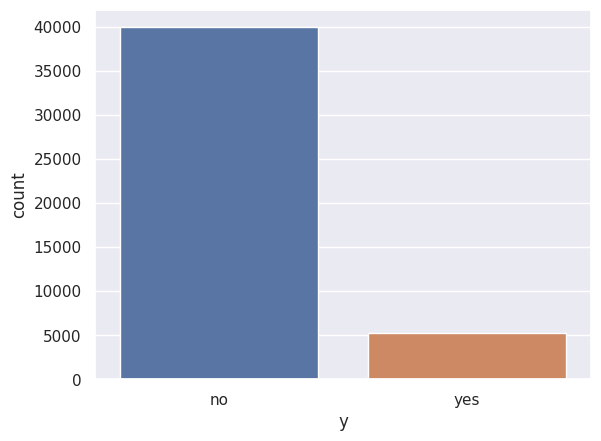

In [121]:
# making a count plot for Y column
sns.set()
sns.countplot(x="y", data=df)
plt.show()

In [122]:
# checking no of parcentage yes and no
countyes=len(df[df.y=='yes'])
countno= len(df[df.y=='no'])
print(f'parcentage of yes---->',countyes/len(df.y)*100)
print(f'parcentage of no---->',countno/len(df.y)*100)

parcentage of yes----> 11.698480458295547
parcentage of no----> 88.30151954170445


In [123]:
# Replacing categorical columns
df.replace({'y':{'no':0,'yes':1}},inplace=True)

<ipython-input-124-81fb70672018>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'][df['y']==1])
<ipython-input-124-81fb70672018>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'][df['y']==0])


<Axes: xlabel='age', ylabel='Density'>

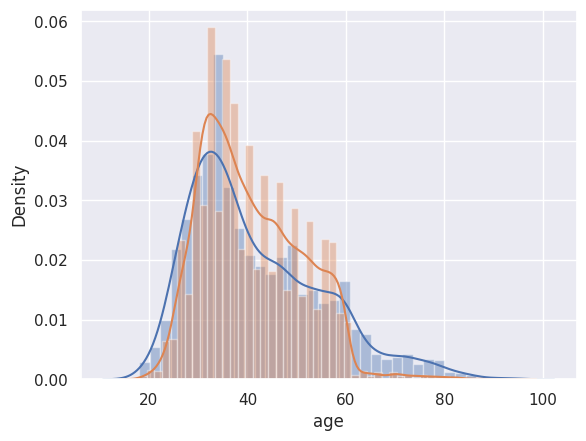

In [124]:
sns.distplot(df['age'][df['y']==1])
sns.distplot(df['age'][df['y']==0])

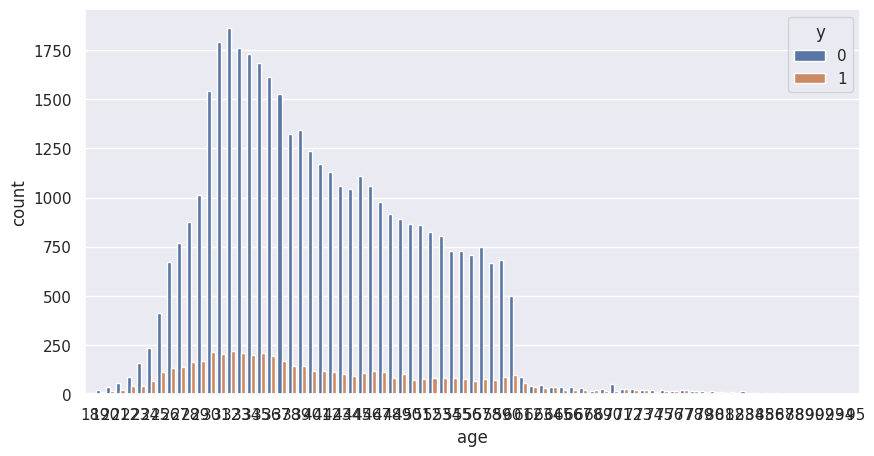

In [125]:
# no of y Age base
plt.figure(figsize=(10,5))
sns.countplot(x='age', hue='y', data=df)
plt.show()


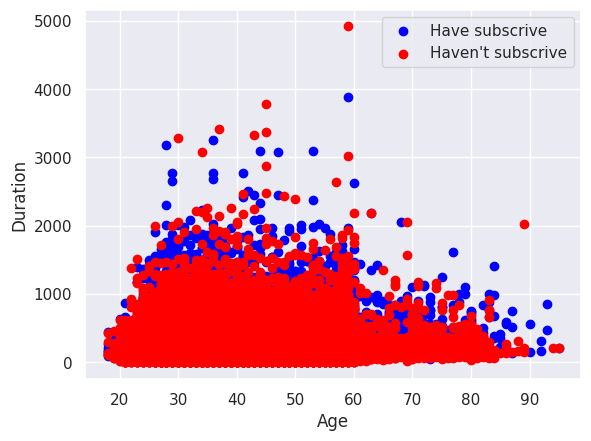

In [126]:
plt.scatter(x=df.age[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.age[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [127]:
# checking parcentage of people y in age
df.groupby(['age'])['y'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: y, Length: 77, dtype: float64

In [128]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

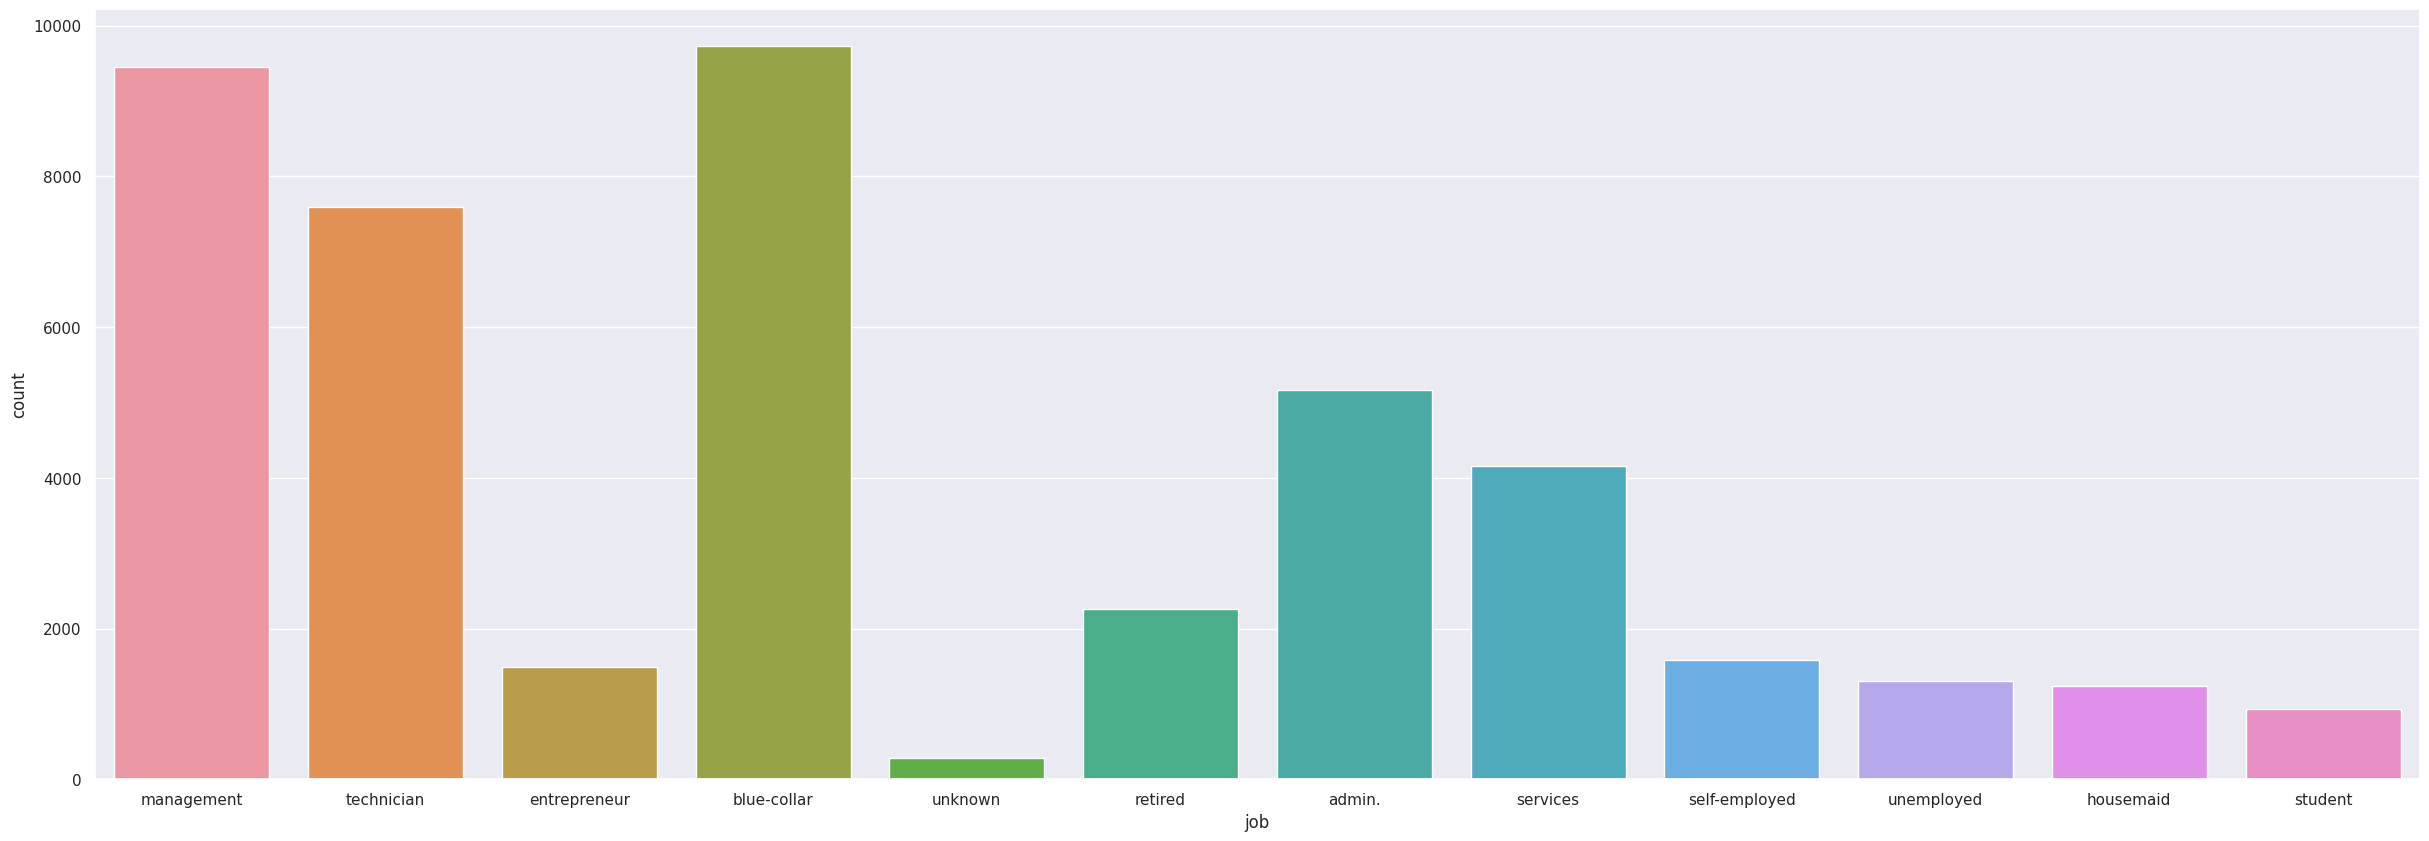

In [129]:
# making a count plot for job column
plt.figure(figsize=(30,10))
sns.countplot(x="job", data=df)
plt.show()


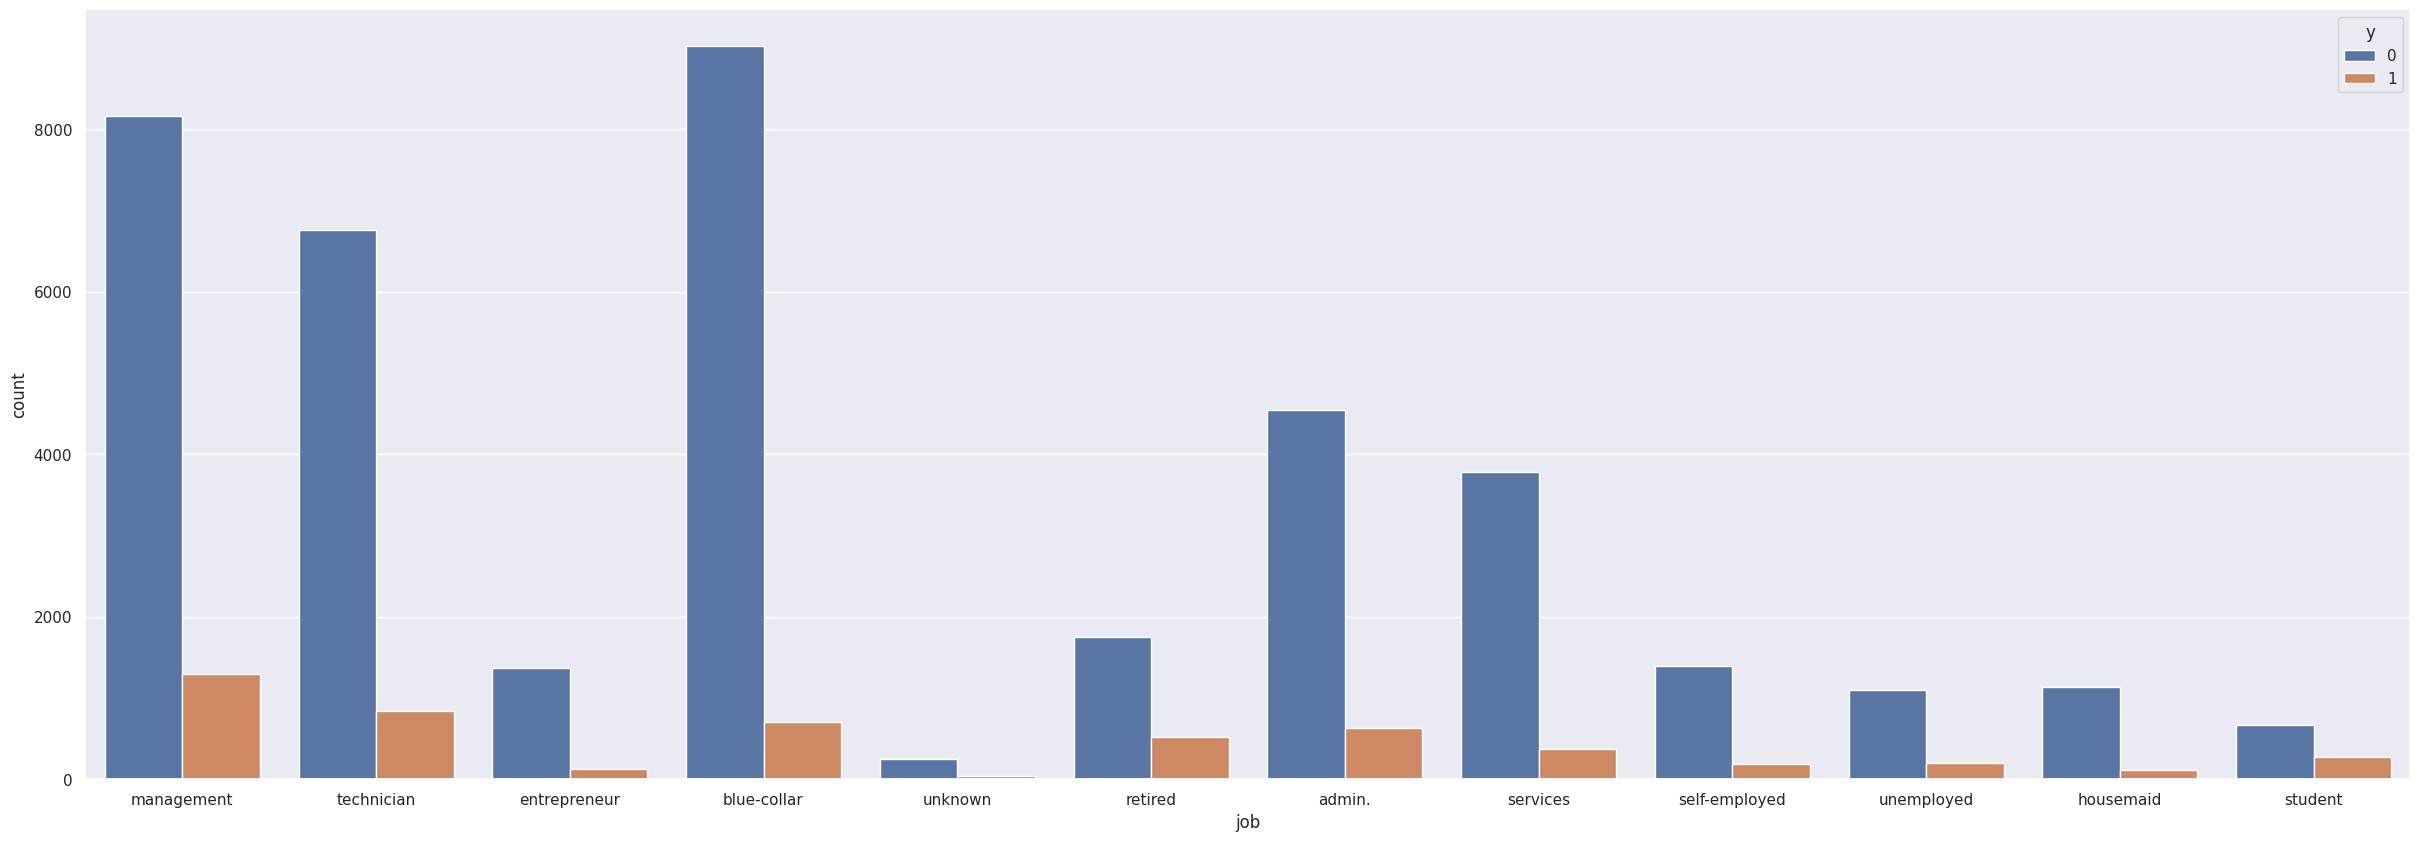

In [130]:
# no of y job base
plt.figure(figsize=(30,10))
sns.countplot(x='job', hue='y', data=df)
plt.show()


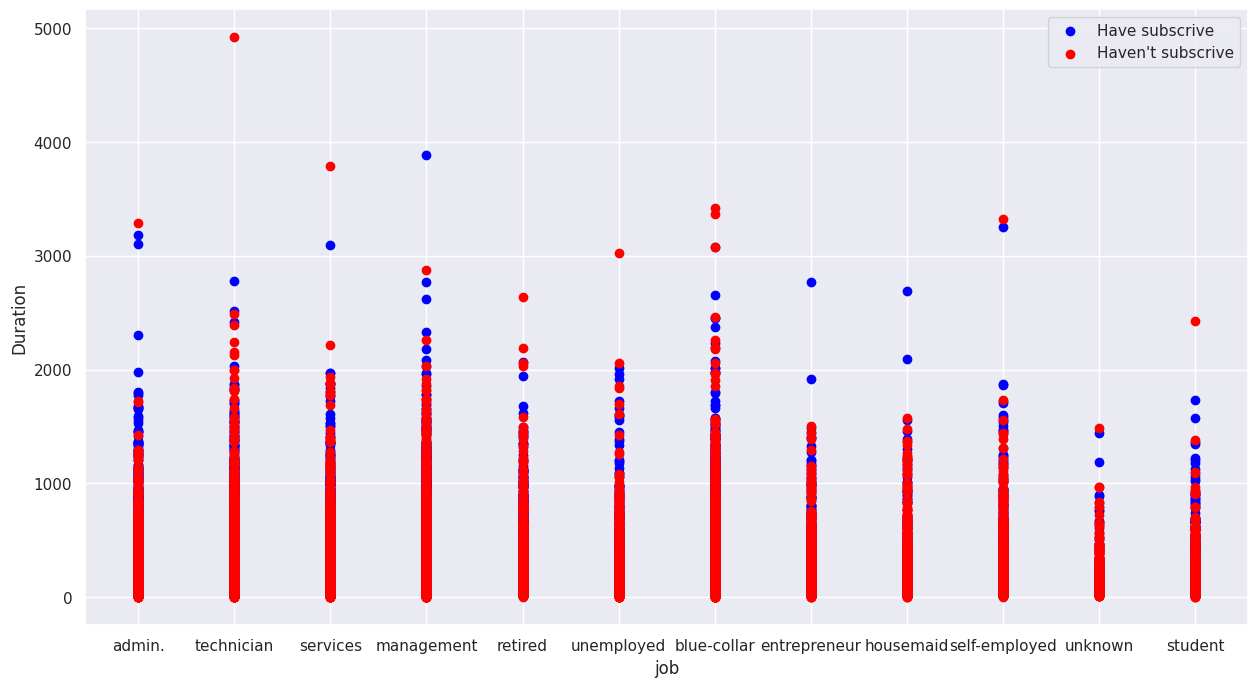

In [131]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.job[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.job[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('job')
plt.ylabel('Duration')
plt.show()

In [132]:
# checking parcentage of people y in job
df.groupby(['job'])['y'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

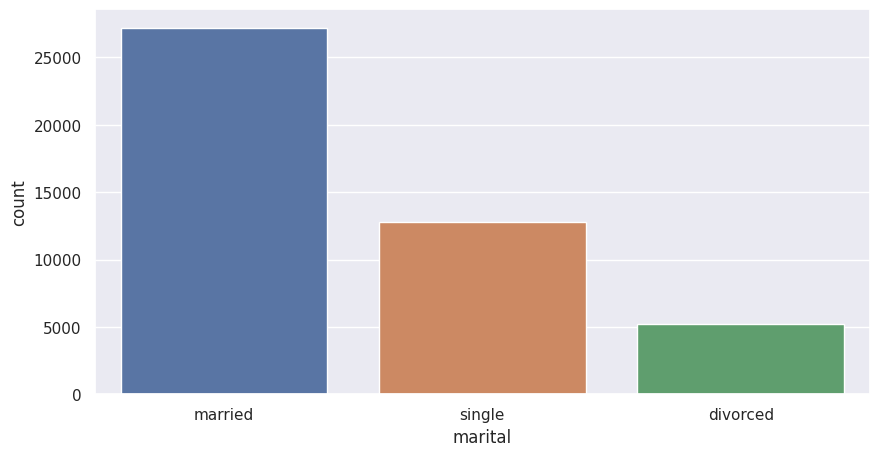

In [133]:
# making a count plot for marital column
plt.figure(figsize=(10, 5))
sns.countplot(x='marital', data=df)
plt.show()


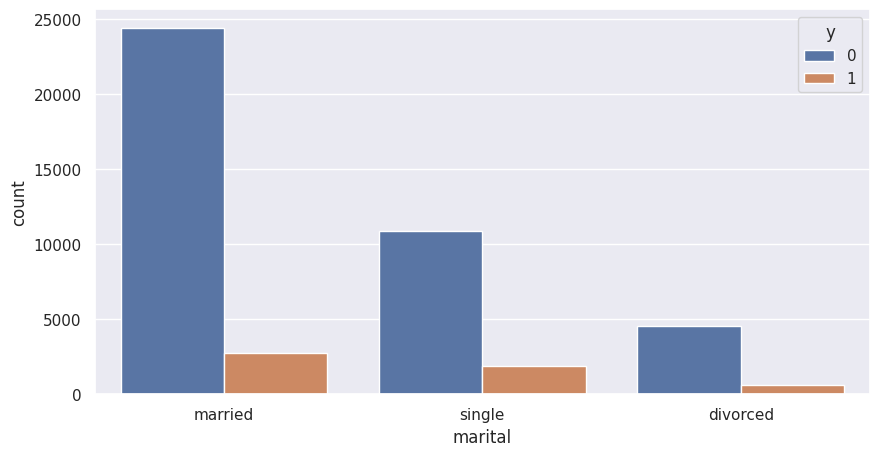

In [134]:
# no of y marital base
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.countplot(x='marital', hue='y', data=df)
plt.show()


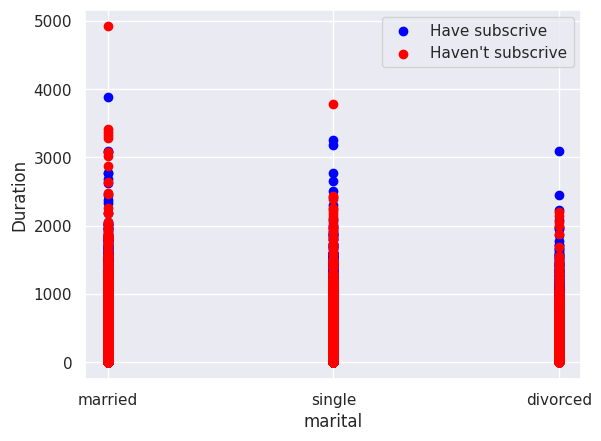

In [135]:
# plt.figure(figsize=(15,8))
plt.scatter(x=df.marital[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.marital[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [136]:
# checking parcentage of people y in marital
df.groupby(['marital'])['y'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: y, dtype: float64

In [137]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

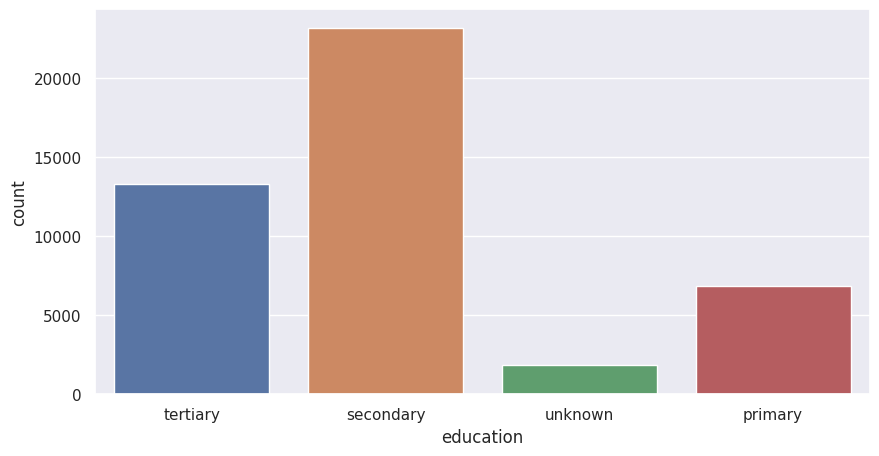

In [138]:
# making a count plot for Y column
plt.figure(figsize=(10, 5))
sns.countplot(x='education', data=df)
plt.show()


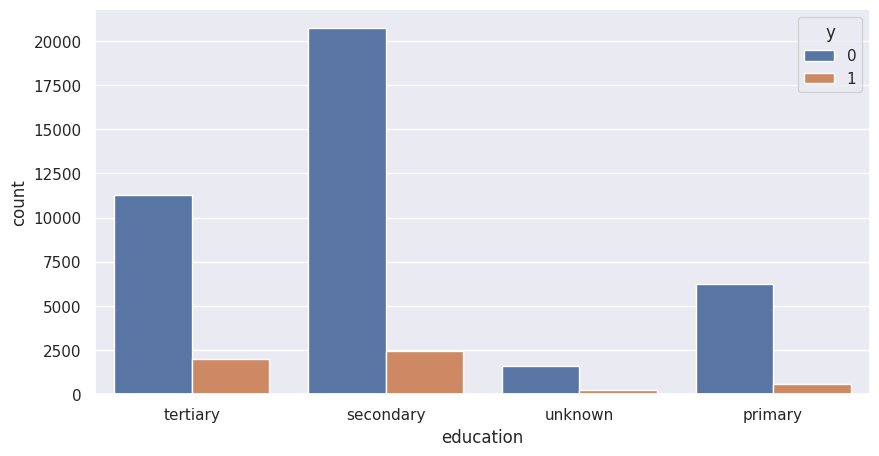

In [139]:
# no of y education base
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.countplot(x='education', hue='y', data=df)
plt.show()


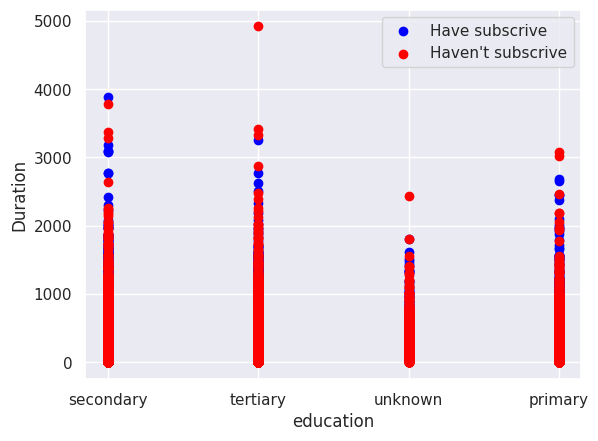

In [140]:
plt.scatter(x=df.education[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.education[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('education')
plt.ylabel('Duration')
plt.show()

In [141]:
# checking parcentage of people y in education
df.groupby(['education'])['y'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: y, dtype: float64

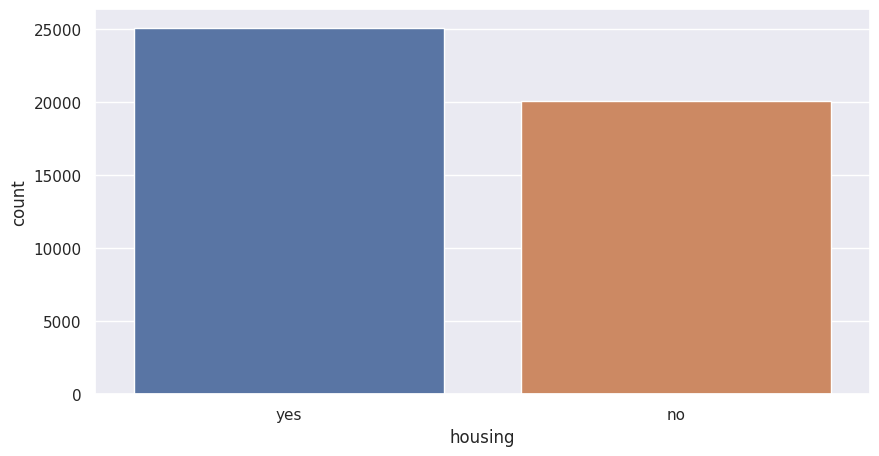

In [142]:
# making a count plot for housing column
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.countplot(x='housing', data=df)
plt.show()


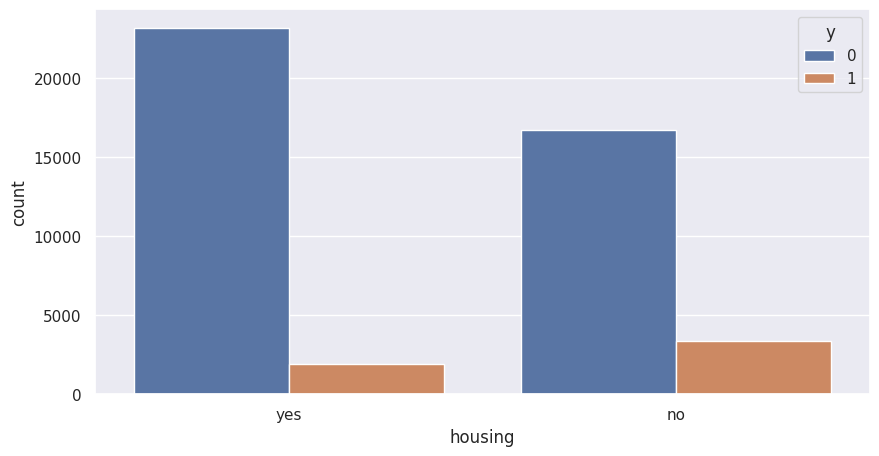

In [143]:
# no of y housing base
plt.figure(figsize=(10, 5))
sns.countplot(x='housing', hue='y', data=df)
plt.show()


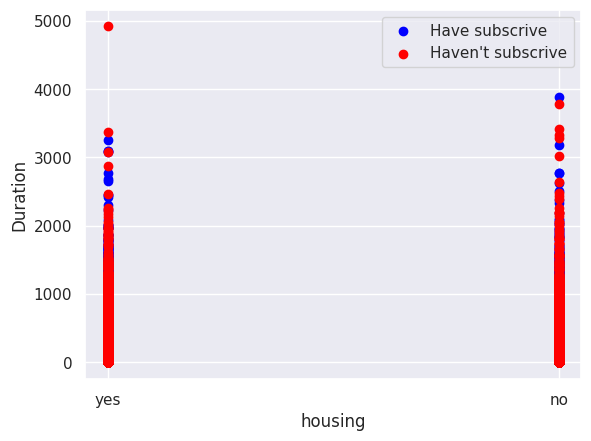

In [144]:
plt.scatter(x=df.housing[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.housing[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [145]:
# checking parcentage of people y in housing
df.groupby(['housing'])['y'].mean()

housing
no     0.167024
yes    0.077000
Name: y, dtype: float64

In [146]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

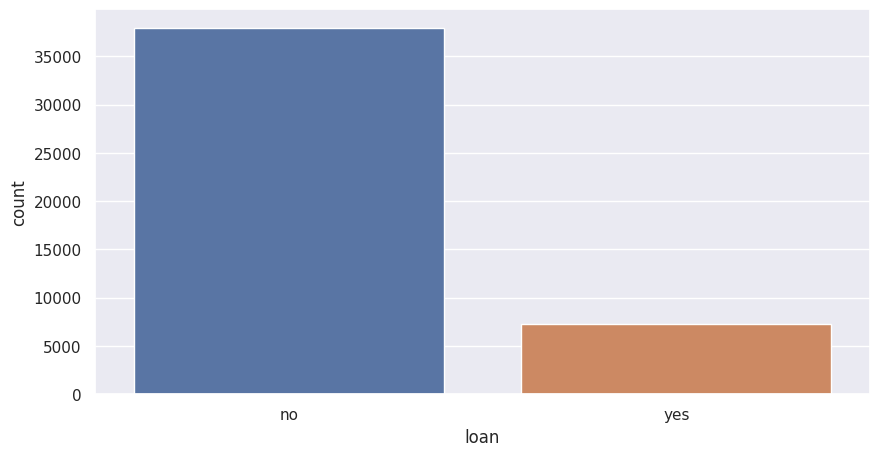

In [147]:
# making a count plot for loan column
plt.figure(figsize=(10, 5))
sns.countplot(x='loan', data=df)
plt.show()


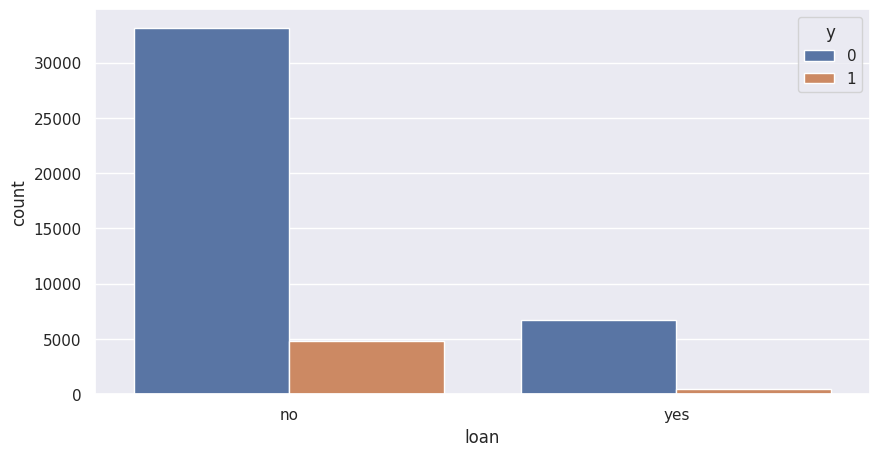

In [148]:
# no of y loan base
plt.figure(figsize=(10, 5))
sns.countplot(x='loan', hue='y', data=df)
plt.show()


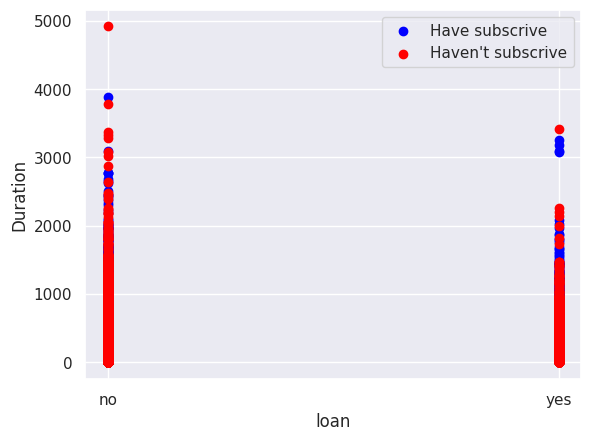

In [149]:
plt.scatter(x=df.loan[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.loan[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()

In [150]:
# checking parcentage of people y in loan
df.groupby(['loan'])['y'].mean()

loan
no     0.126557
yes    0.066814
Name: y, dtype: float64

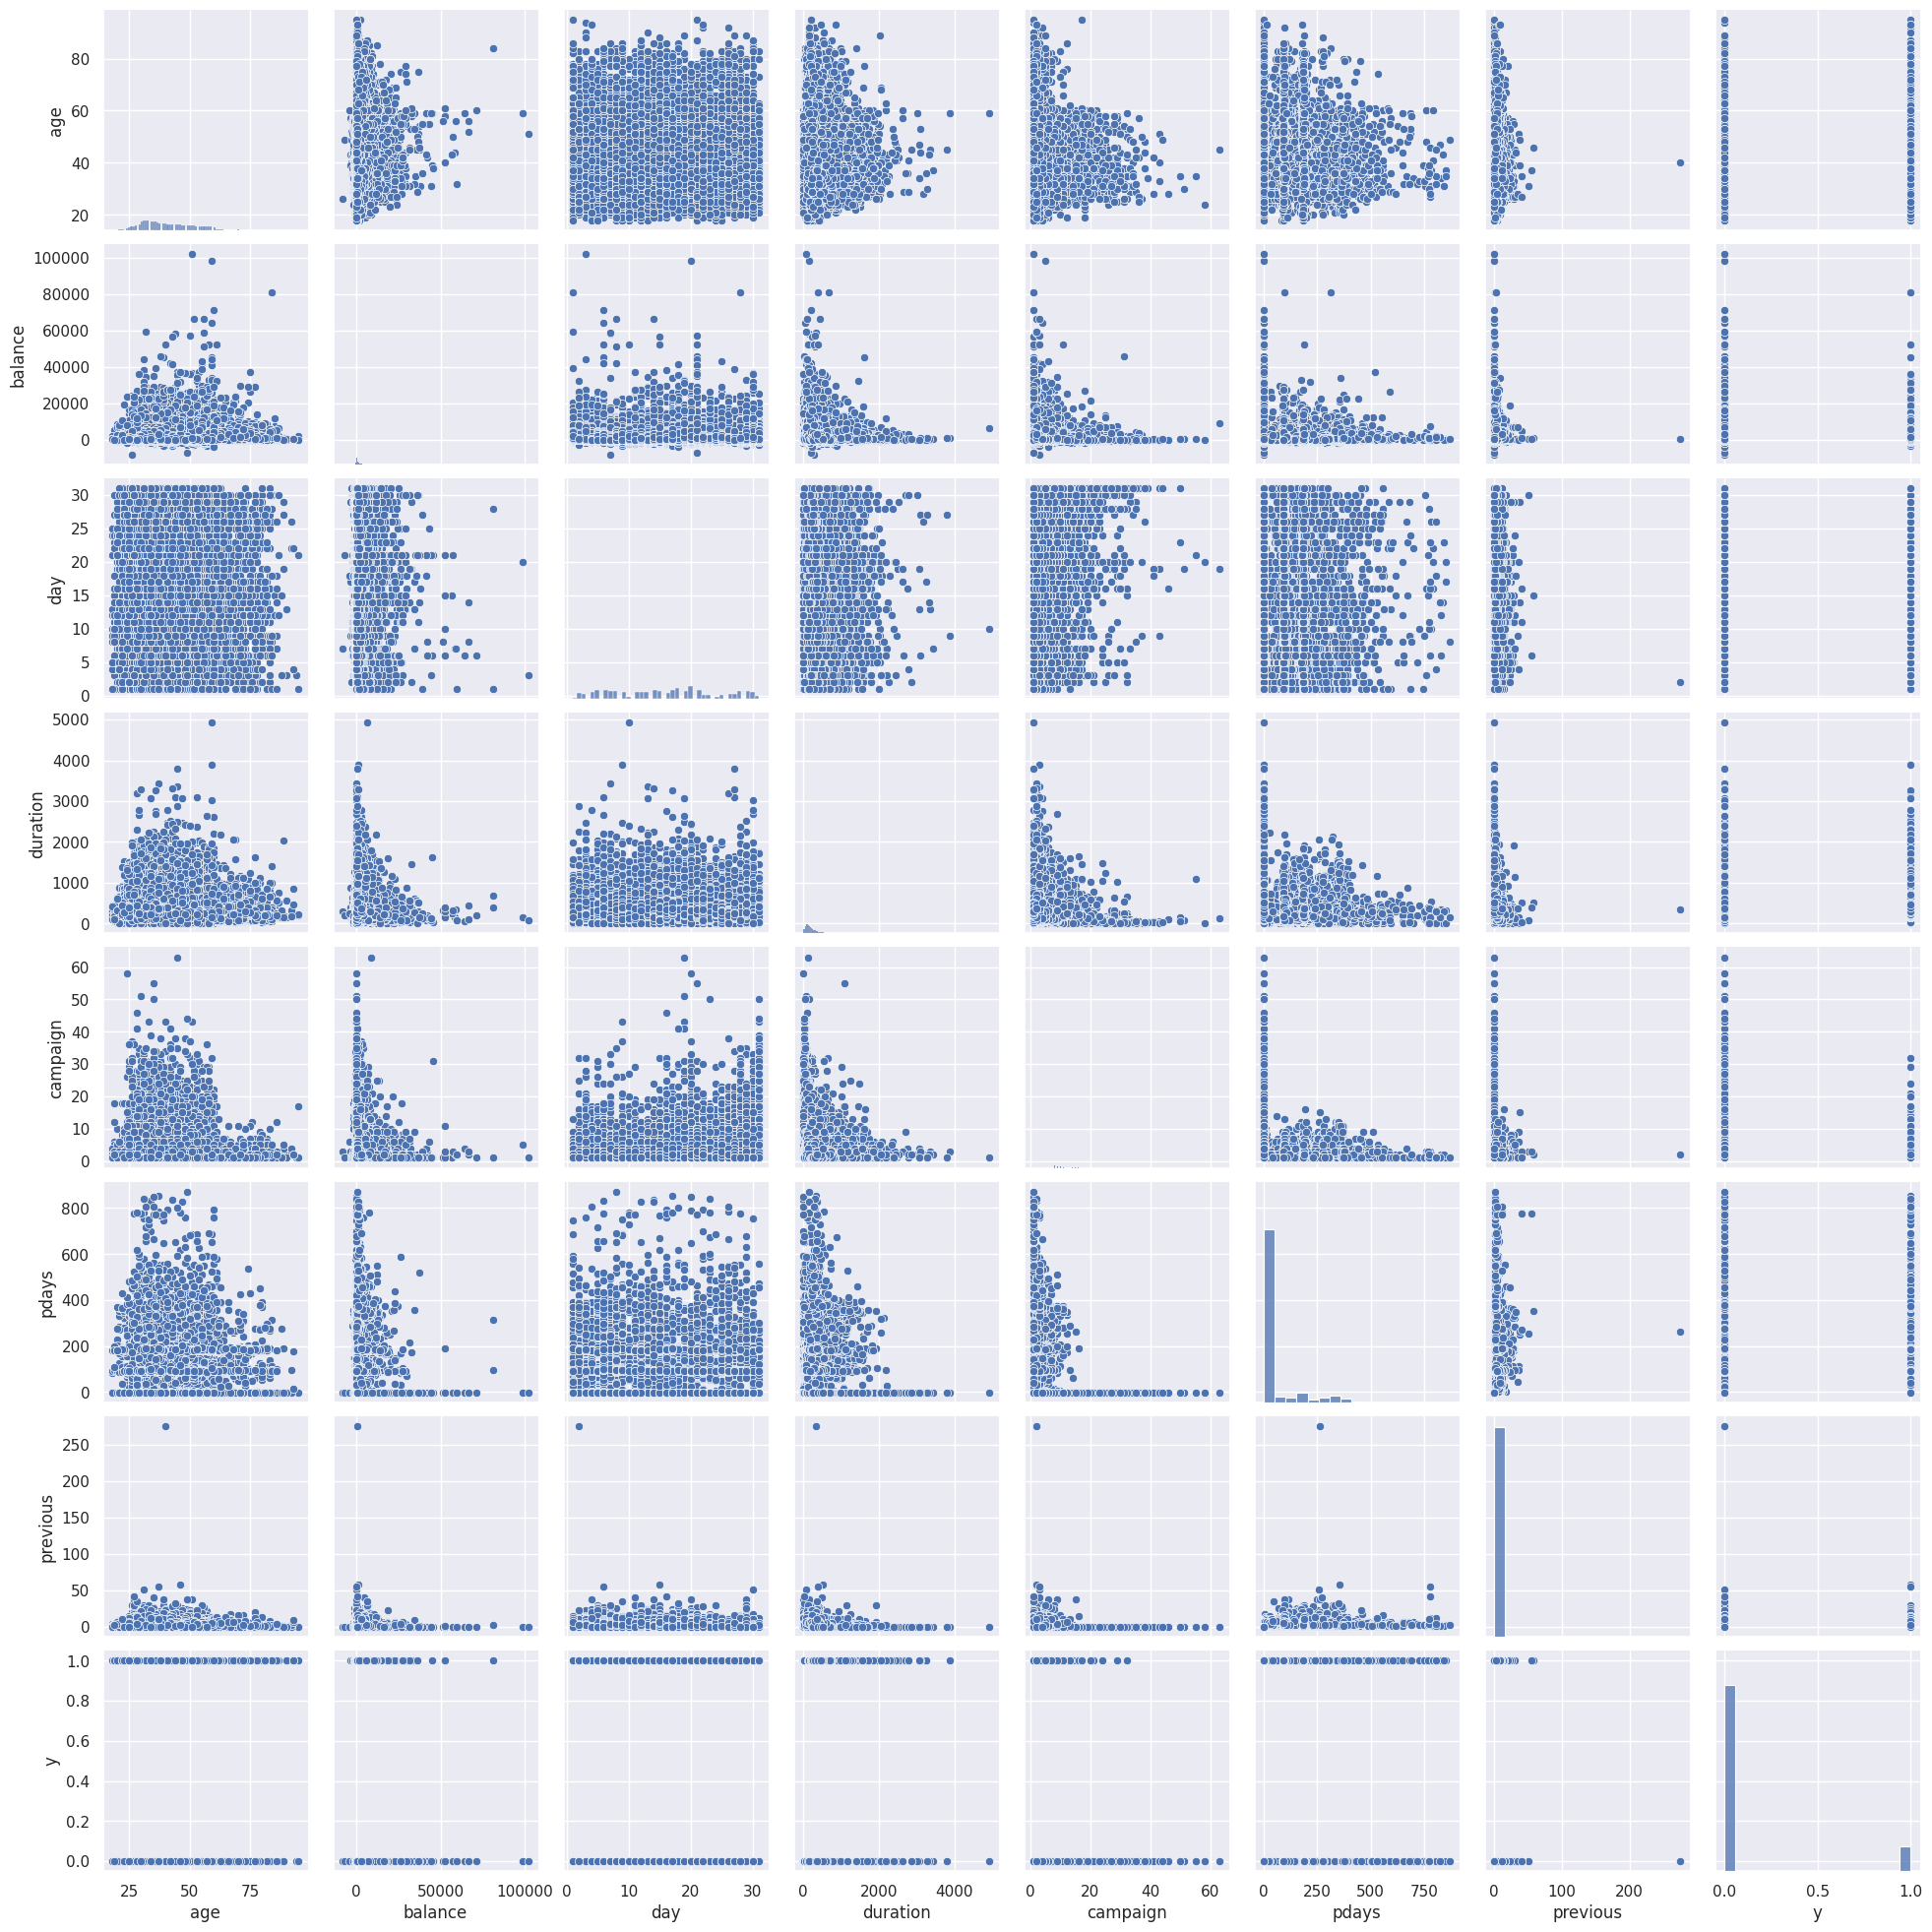

In [151]:
sns.pairplot(data=df)

In [152]:
# sns.pairplot(data=df,hue='y',vars=['age','job','marital','education','housing','loan','balance','duration'])

<ipython-input-153-99100a92d457>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,cmap='viridis')


<Axes: >

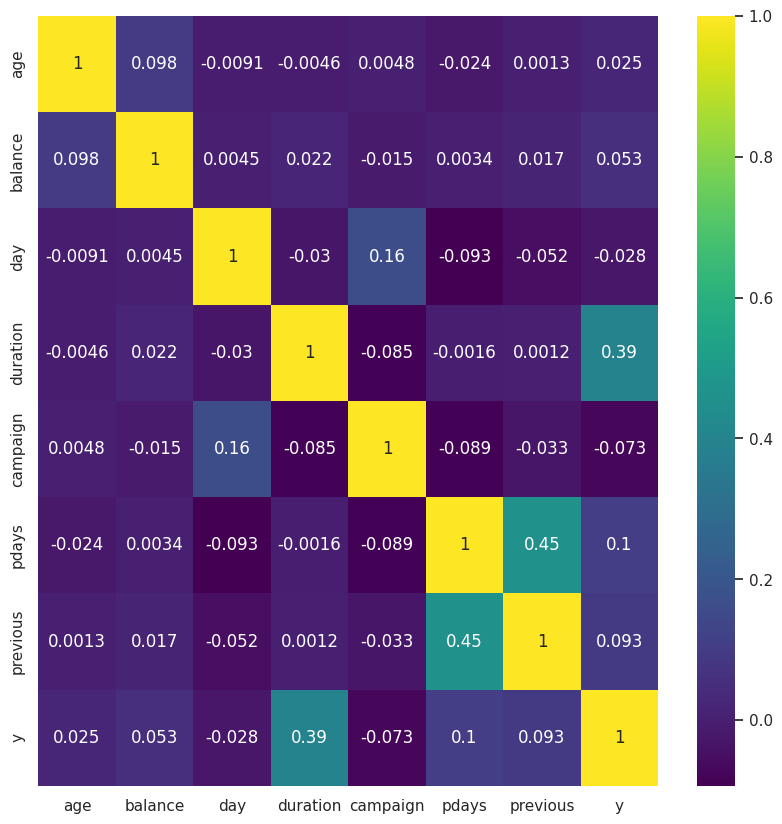

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

In [154]:
df.corr()

<ipython-input-154-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [155]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24330,39,management,married,tertiary,no,500,yes,no,cellular,17,nov,257,1,178,2,other,0
29239,58,retired,married,secondary,no,158,yes,yes,cellular,2,feb,156,5,-1,0,unknown,0
32932,38,management,single,tertiary,no,4082,yes,no,cellular,17,apr,322,2,-1,0,unknown,0
33549,28,admin.,married,secondary,no,49,yes,no,cellular,20,apr,17,3,-1,0,unknown,0


# Encoding

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [157]:
# Encoding categorical columns
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [158]:
# Encoding categorical columns
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [159]:
# Encoding categorical columns
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [160]:
# Encoding categorical columns
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [161]:
# Encoding categorical columns
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [162]:
# Encoding categorical columns
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [163]:
# Replacing all categorical columns
df.replace({'job':{ 'blue-collar' : 0,
                    'management'  : 1,
                   'technician'   : 2,
                    'admin.'      : 3,
                    'services'    : 4,
                    'retired'     : 5,
                    'self-employed':6,
                    'entrepreneur' :7,
                    'unemployed'   :8,
                    'housemaid'    :9,
                    'student'      :10,
                    'unknown'      :11, },
            'marital':{'married':0,'single':1,'divorced':2},
            'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},
            'default':{'no':0,'yes':1},
            'housing':{'no':0,'yes':1},
            'loan':{'no':0,'yes':1}
                      },inplace=True)

In [164]:
# Drop columns
df.drop(columns=['contact','day','month','poutcome'],inplace=True)

In [165]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
36642,48,1,0,0,0,-440,1,1,399,1,-1,0,0
7982,36,1,0,1,0,596,1,0,372,2,-1,0,0
38213,28,0,0,0,0,4,1,0,310,1,-1,0,0
32234,31,2,1,1,0,2530,1,0,60,1,342,1,0
38474,34,0,2,0,0,1614,1,0,228,2,297,1,0


# Pre-Modeling

In [166]:
x=df.drop(columns=['y'])
y=df.y

In [167]:
x.shape

(45211, 12)

In [168]:
y.shape

(45211,)

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Using Logistic Regression

In [170]:
Lor=LogisticRegression()
Lor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
Lor.score(x_test,y_test)

0.8894172287957536

In [172]:
train_score = Lor.score(x_train,y_train)
print(train_score)

test_score = Lor.score(x_test,y_test)
print(test_score)

0.8891561601415616
0.8894172287957536


In [173]:
print(classification_report(y_test,Lor.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.56      0.20      0.30      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.89      0.87      9043



In [174]:
print(confusion_matrix(y_test,Lor.predict(x_test)))

[[7828  166]
 [ 834  215]]


# Using RandomForestClassifier

In [175]:
Rm = RandomForestClassifier()
Rm.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
Rm.score(x_test,y_test)

0.8972686055512551

In [177]:
train_score = Rm.score(x_train,y_train)
print(train_score)

test_score = Rm.score(x_test,y_test)
print(test_score)

0.9999723512497235
0.8972686055512551


In [ ]:
print(classification_report(y_test,Rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.60      0.35      0.44      1049

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [178]:
print(confusion_matrix(y_test,Rm.predict(x_test)))

[[7739  255]
 [ 674  375]]


# Using DecisionTreeClassifier

In [179]:
Dc = DecisionTreeClassifier()
Dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred = Dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
# Testing Data Evaluation

y_pred = Dc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7279  715]
 [ 636  413]]
**************************************************
Accuracy Score = 0.8506026761030632
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7994
           1       0.37      0.39      0.38      1049

    accuracy                           0.85      9043
   macro avg       0.64      0.65      0.65      9043
weighted avg       0.86      0.85      0.85      9043



In [182]:
# Training Data Evaluation

y_pred = Dc.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
**************************************************
Accuracy Score = 1.0
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [183]:
# bias - Variance Tradeoff

# bias >> low
# variance >> high

# Overfitting

# Randoimisezed search

In [184]:
 DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [185]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [186]:
# Testing Data Evaluation

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7994
           1       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [187]:
# Training Data Evaluation

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31928
           1       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



In [188]:
# Bias >> low
# variance >> low

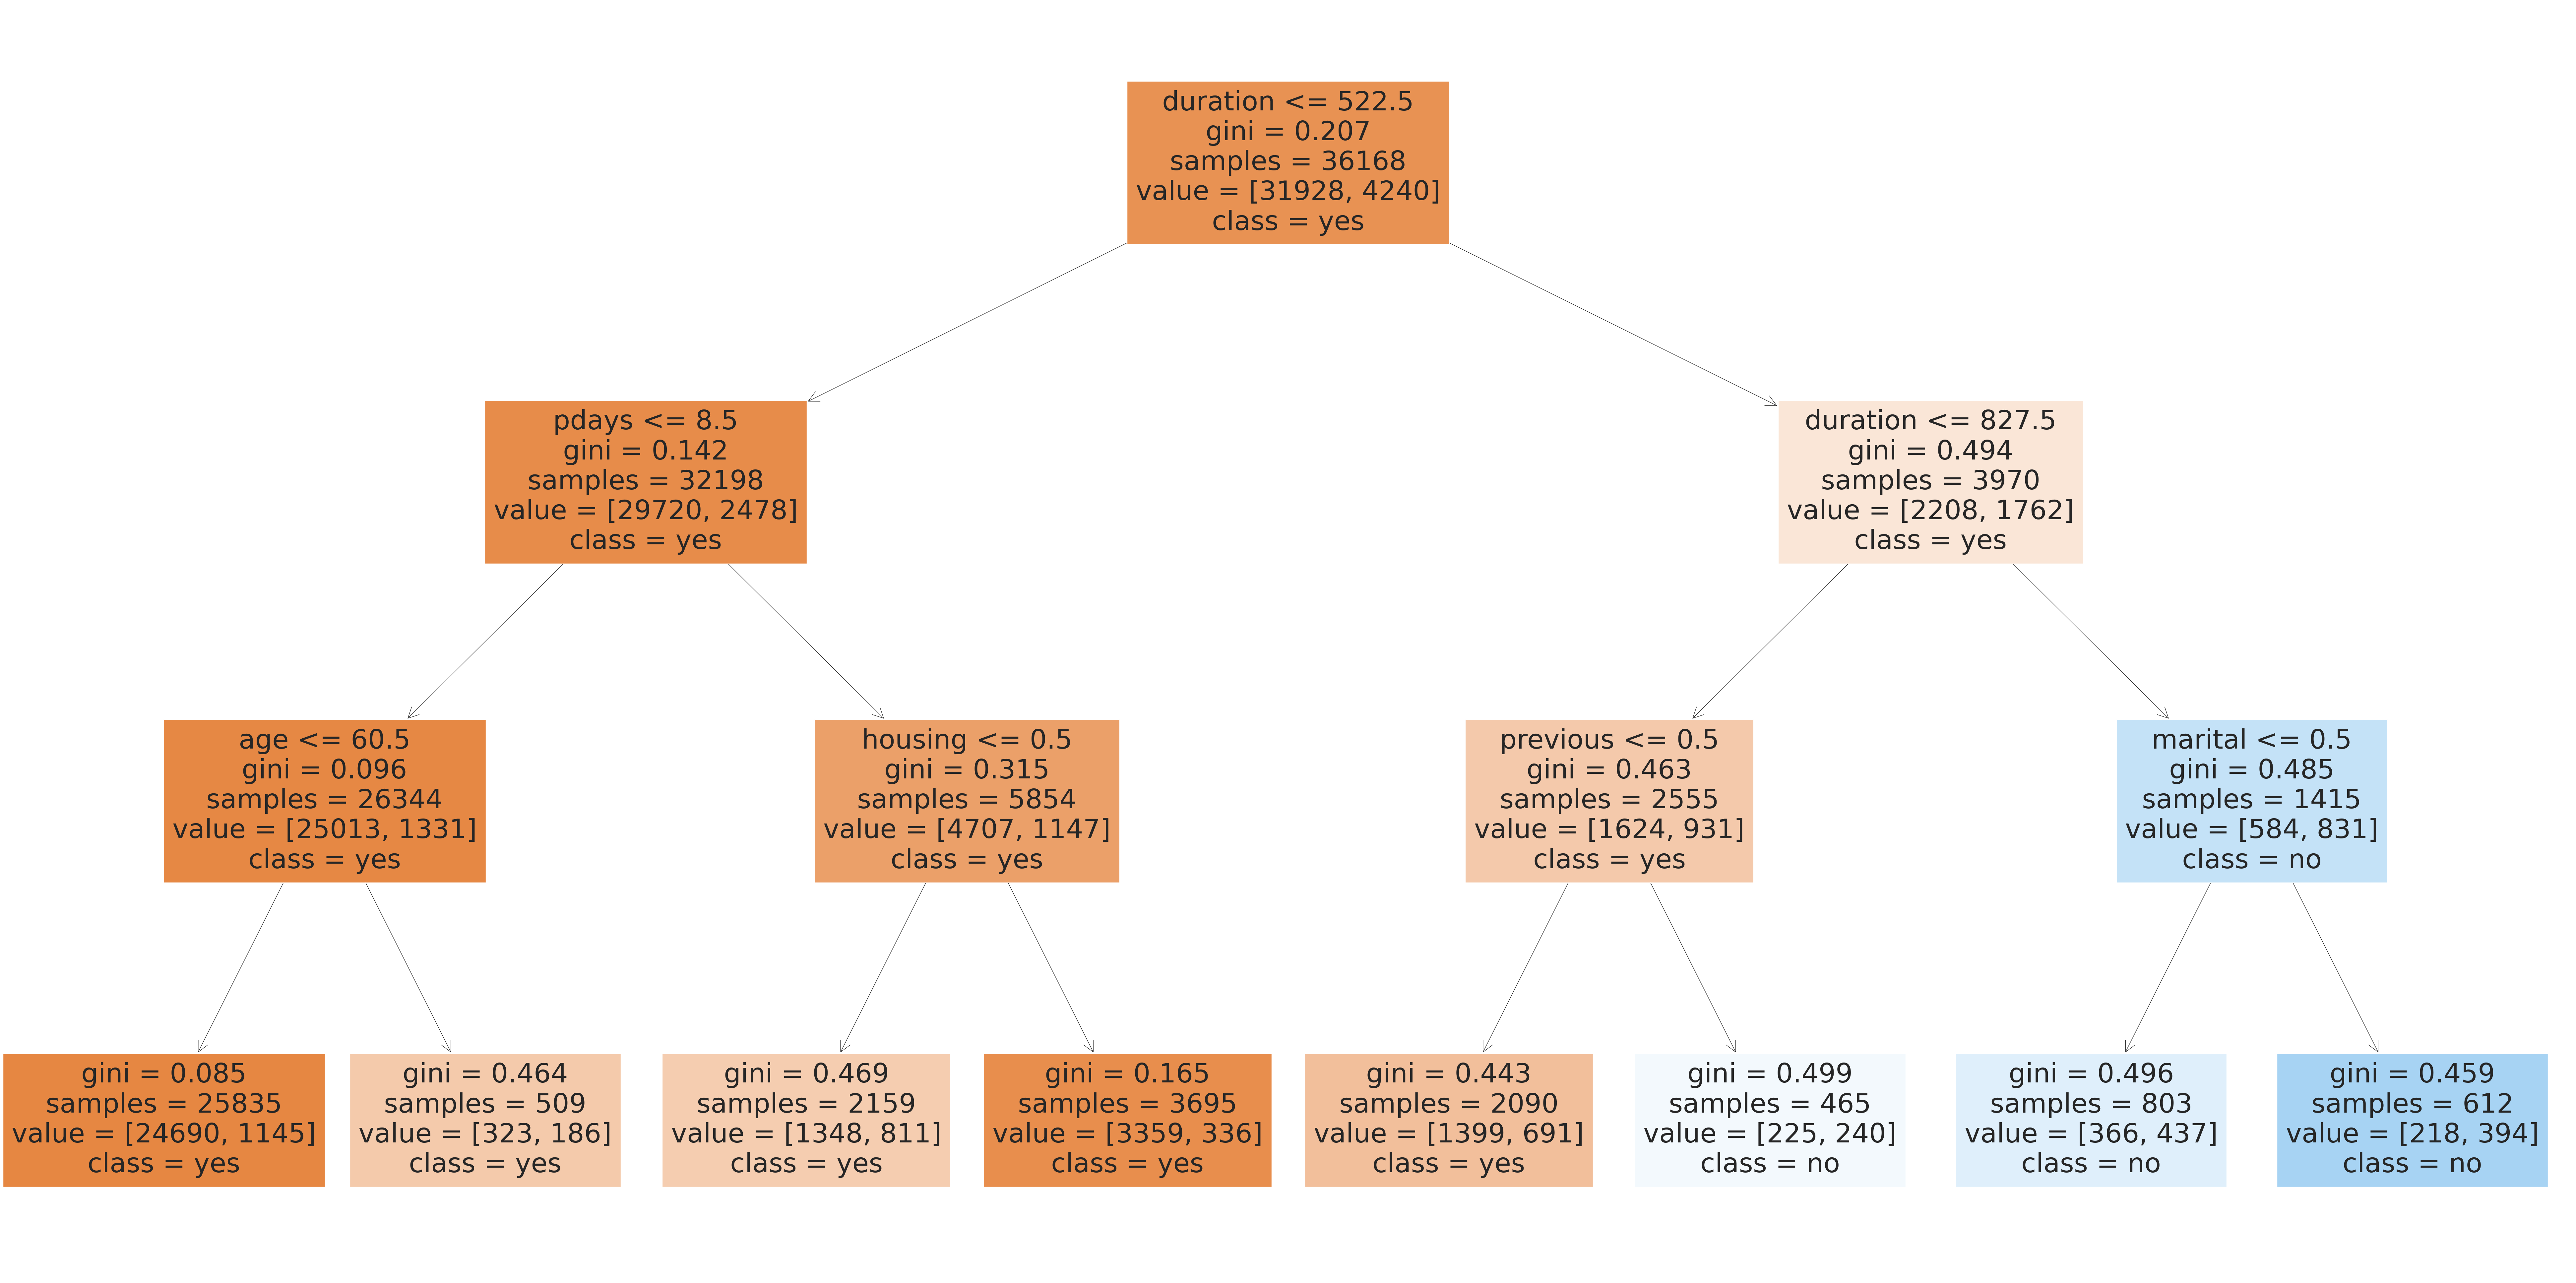

In [189]:
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])
plt.savefig("decision_tree.png")

# Save Model File

In [190]:
with open('model.pkl','wb') as file:
    pickle.dump(DC,file)

# Read pickle file

In [191]:
pkl=pd.read_pickle('model.pkl')
pkl

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)